In [2]:
import torch
import torch.nn as nn
import numpy as np
from torch.utils.data import Dataset, DataLoader
import matplotlib.pyplot as plt
import pandas as pd

# Validation

### Preparing validation data

In [3]:
valid_data = pd.read_csv('./data/valid_dst.csv')
valid_data.set_index('index', inplace=True)
valid_data

,Bz_GSE,Sigma_Bz_GSE,Proton_density,Plasma_speed,Dst_index
index,,,,,
1979-01-01 00:00:00,0.031250,0.027174,0.018943,0.641372,-0.093248
1979-01-01 01:00:00,0.012500,0.092391,0.017946,0.643451,-0.086817
1979-01-01 02:00:00,0.031250,0.043478,0.016949,0.634096,-0.093248
1979-01-01 03:00:00,0.021875,0.027174,0.014955,0.625780,-0.096463
1979-01-01 04:00:00,0.046875,0.016304,0.014955,0.626819,-0.099678
...,...,...,...,...,...
1981-12-31 19:00:00,0.096875,0.021739,0.038883,0.547817,-0.086817
1981-12-31 20:00:00,-0.062500,0.048913,0.029910,0.566528,-0.086817
1981-12-31 21:00:00,-0.028125,0.076087,0.042871,0.456341,-0.086817


<Axes: xlabel='index'>

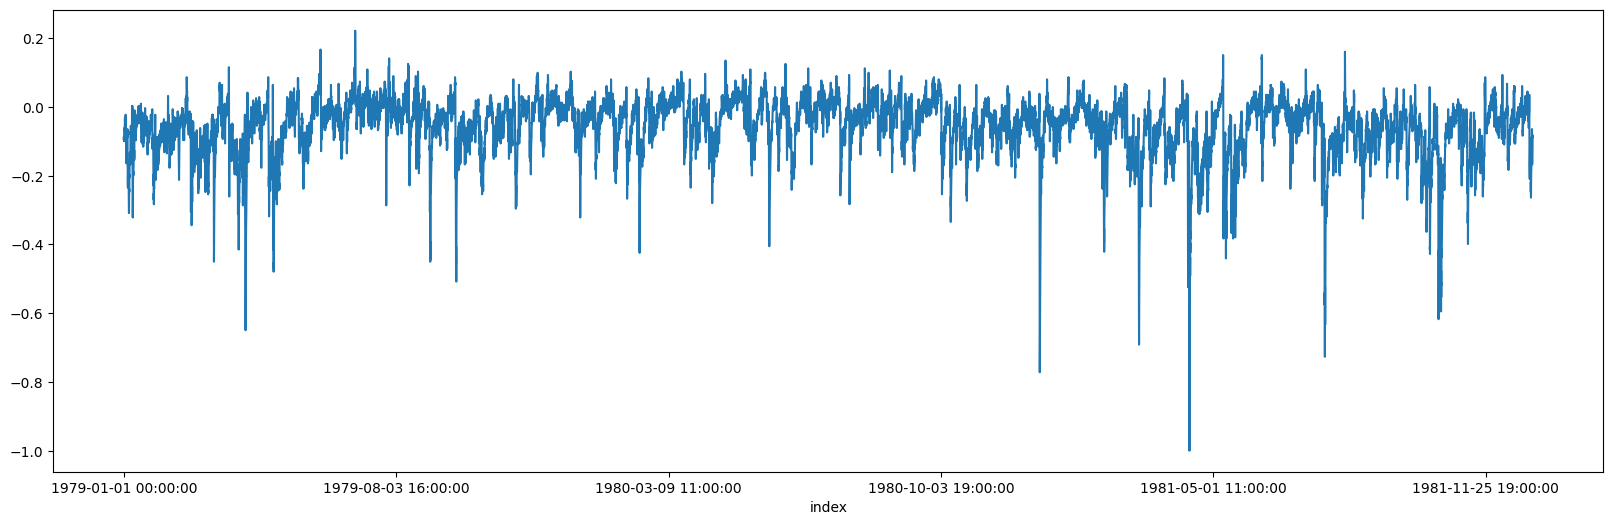

In [6]:
valid_data['Dst_index'].plot(figsize=(20, 6))

In [7]:
valid_data.index = pd.to_datetime(valid_data.index)

<Axes: xlabel='index'>

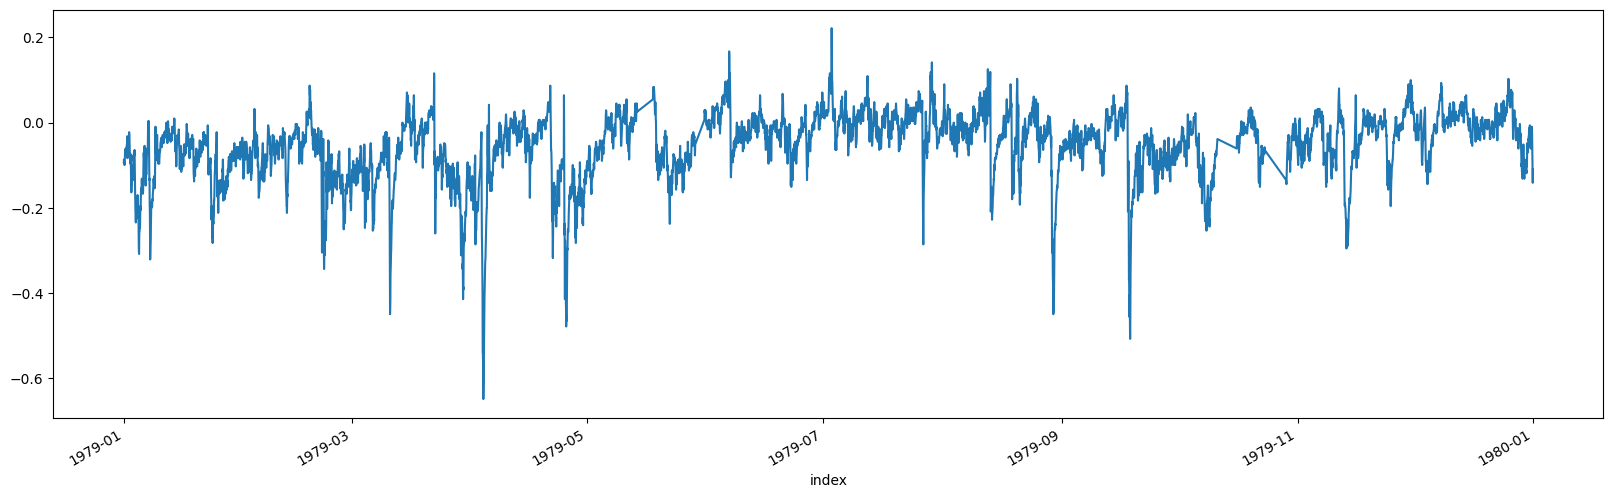

In [15]:
year_1979 = valid_data[valid_data.index.year == 1979]
year_1979['Dst_index'].plot(figsize=(20, 6))

In [16]:
def generate_batches(a, b, c, d, y, n):
    y = y[8:]
    y = torch.from_numpy(np.array(y))

    batches = []

    for i in range(n):
        if (i+8) <= n:
            # print(i, i+8)
            batch_a = a[i:i+8]
            batch_b = b[i:i+8]
            batch_c = c[i:i+8]
            batch_d = d[i:i+8]

            final_batch = np.concatenate((batch_a, batch_b, batch_c, batch_d), axis=None)

            batches.append(final_batch)

    batches = batches[:-1]
    batches = torch.from_numpy(np.array(batches))

    return batches, y

In [17]:
x_valid, y_valid = generate_batches(
    year_1979['Bz_GSE'], 
    year_1979['Sigma_Bz_GSE'], 
    year_1979['Proton_density'], 
    year_1979['Plasma_speed'],
    year_1979['Dst_index'],
    len(year_1979)
)

In [20]:
x_valid.size(), y_valid.size()

(torch.Size([8349, 32]), torch.Size([8349]))